In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('spam.csv', encoding='latin-1')

In [3]:
df.head(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN
6,ham,Even my brother is not like to speak with me. ...,NaN,NaN,NaN
7,ham,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN
8,spam,WINNER!! As a valued network customer you have...,NaN,NaN,NaN
9,spam,Had your mobile 11 months or more? U R entitle...,NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

In [5]:
# 1. Data CLeaning
# 2. EDA-- Exploratory Data Analysis
# 3. Text Preprocessing
# 4. Model Building
# 5. Evaluation of Model
# 6. Improvement of Model 
# 7. Website Building and Other
# 8. Deploy in server


 ## Step 1. Data Cleaning of spam Data

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
# Dropping last 3 columns as we have only 50 rows at max from which we cannot analyze anything beacuse it is o less data
df.drop(columns=['Unnamed: 4','Unnamed: 3','Unnamed: 2'],inplace=True)

In [8]:
df.sample(5)

,v1,v2
2033,ham,IM GONNA MISS U SO MUCH
80,ham,"Sorry, I'll call later"
1967,ham,Even i cant close my eyes you are in me our va...
4929,spam,"Hi, the SEXYCHAT girls are waiting for you to ..."
2733,ham,Do Ì_ noe if ben is going?


In [9]:
df.shape

(5572, 2)

In [10]:
# Renaimg a columns
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(3)

,target,text
4534,ham,IM LATE TELLMISS IM ON MY WAY
571,ham,Do you know where my lab goggles went
4419,ham,Ok i msg u b4 i leave my house.


In [11]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [12]:
# Changes ham to 0 and spam to 1
df['target'] = encoder.fit_transform(df['target'])

In [13]:
df.head(2)

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...


In [14]:
# Checking Missing Values
df.isnull().sum()

target    0
text      0
dtype: int64

In [15]:
# Checking for Duplicate Values
df.duplicated().sum()

403

In [16]:
# Removing Duplicate
df = df.drop_duplicates(keep='first')

In [17]:
df.shape

(5169, 2)

In [18]:
print(f"Duplicate Value is: {df.duplicated().sum()}")
print(f"Number of Null Value Value is: {df.isnull().sum()}")

Duplicate Value is: 0
Number of Null Value Value is: target    0
text      0
dtype: int64


# Step 2: Exploratory Data Analysis (EDA) 

In [19]:
df.head(5)

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [20]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x296072a1b10>,
 [Text(-1.0144997251399075, 0.4251944351600247, 'Ham'),
  Text(1.014499764949479, -0.4251943401757036, 'Spam')],
 [Text(-0.5533634864399495, 0.23192423736001344, '87.367'),
  Text(0.5533635081542612, -0.23192418555038377, '12.633')])

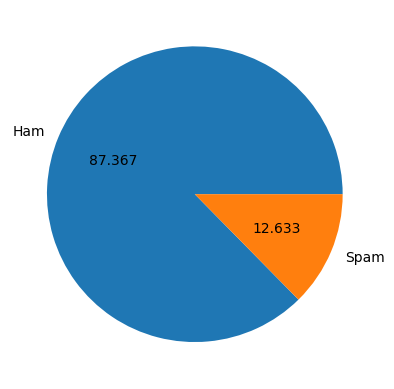

In [21]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['Ham','Spam'],autopct="%.3f")

In [22]:
# Data is imbalanced .i.e. we have around 80% Ham and 13 % Spam

In [23]:
 # !pip install nltlk

In [24]:
import nltk

In [25]:
# nltk.download('punkt')

In [26]:
df['text'].apply(len)

0       111
1        29
2       155
3        49
4        61
       ... 
5567    161
5568     37
5569     57
5570    125
5571     26
Name: text, Length: 5169, dtype: int64

In [27]:
df['num_characters'] = df['text'].apply(len)

In [28]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [29]:
# Fetching Number of words

In [30]:
# Tokenize each text in the 'text' column of the dataframe using nltk.word_tokenize
df['num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))

In [31]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [32]:
df['num_sentences']=  df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [33]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [34]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [35]:
# df[df['target'] == 0 ][['num_characters','num_words','num_sentences']].describe()

In [36]:
# df[df['target'] == 1 ][['num_characters','num_words','num_sentences']].describe()

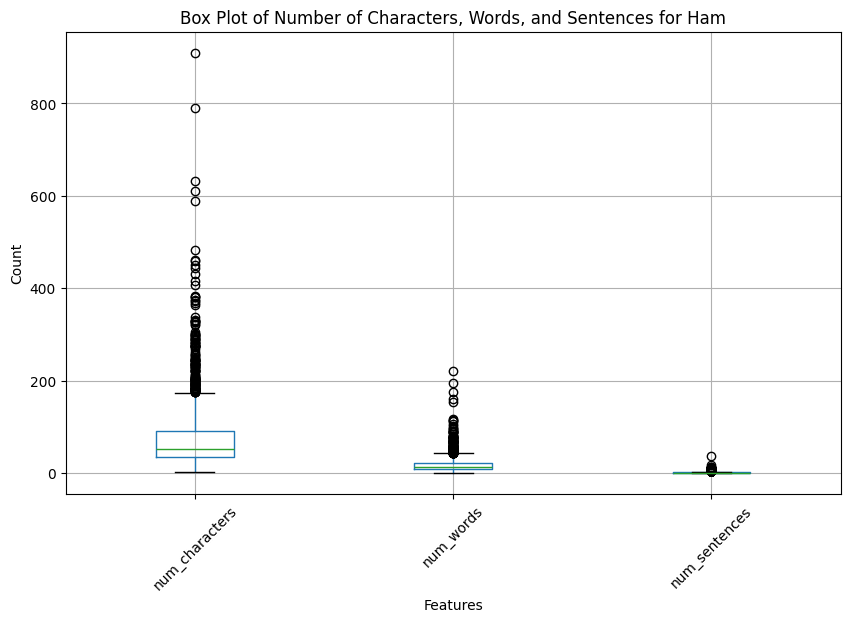

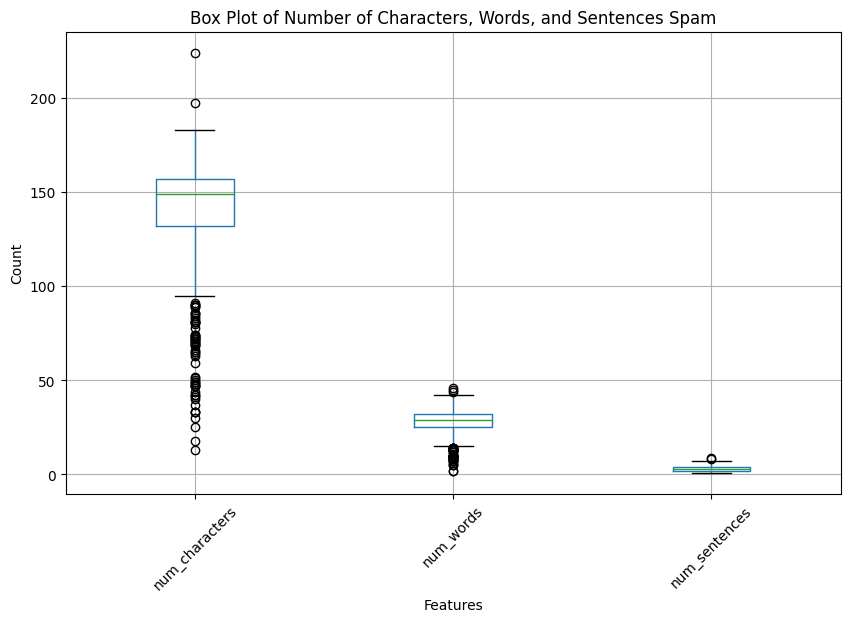

Summary statistics for target value of 0(Ham):
       num_characters    num_words  num_sentences
count     4516.000000  4516.000000    4516.000000
mean        70.459256    17.123782       1.820195
std         56.358207    13.493970       1.383657
min          2.000000     1.000000       1.000000
25%         34.000000     8.000000       1.000000
50%         52.000000    13.000000       1.000000
75%         90.000000    22.000000       2.000000
max        910.000000   220.000000      38.000000

Summary statistics for target value of 1(Spam):
       num_characters   num_words  num_sentences
count      653.000000  653.000000     653.000000
mean       137.891271   27.667688       2.970904
std         30.137753    7.008418       1.488425
min         13.000000    2.000000       1.000000
25%        132.000000   25.000000       2.000000
50%        149.000000   29.000000       3.000000
75%        157.000000   32.000000       4.000000
max        224.000000   46.000000       9.000000


In [37]:
# EDA for target value of 0
df_target_0 = df[df['target'] == 0]
summary_stats_target_0 = df_target_0[['num_characters', 'num_words', 'num_sentences']].describe()

# Box plot for target value of 0
plt.figure(figsize=(10, 6))
df_target_0[['num_characters', 'num_words', 'num_sentences']].boxplot()
plt.title('Box Plot of Number of Characters, Words, and Sentences for Ham')
plt.ylabel('Count')
plt.xlabel('Features')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# EDA for target value of 1
df_target_1 = df[df['target'] == 1]
summary_stats_target_1 = df_target_1[['num_characters', 'num_words', 'num_sentences']].describe()

# Box plot for target value of 1
plt.figure(figsize=(10, 6))
df_target_1[['num_characters', 'num_words', 'num_sentences']].boxplot()
plt.title('Box Plot of Number of Characters, Words, and Sentences Spam')
plt.ylabel('Count')
plt.xlabel('Features')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

print("Summary statistics for target value of 0(Ham):")
print(summary_stats_target_0)

print("\nSummary statistics for target value of 1(Spam):")
print(summary_stats_target_1)


In [38]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

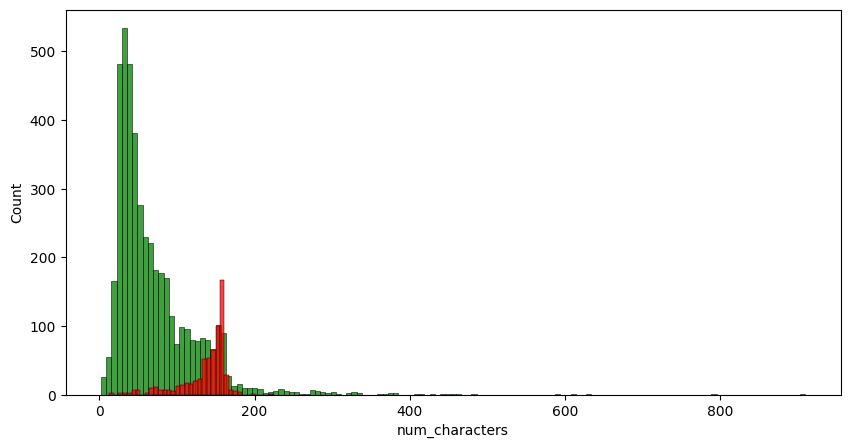

In [39]:
plt.figure(figsize=(10,5))
sns.histplot(df[df['target']==0]['num_characters'],color='green')
sns.histplot(df[df['target']==1]['num_characters'],color='Red')

<Axes: xlabel='num_words', ylabel='Count'>

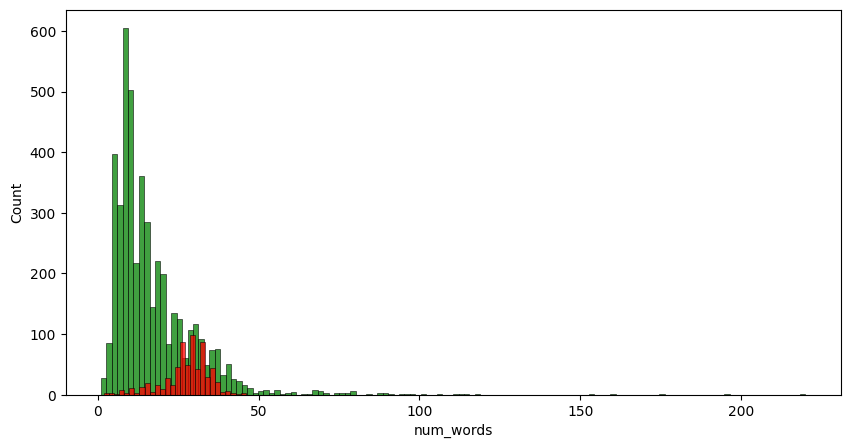

In [40]:
plt.figure(figsize=(10,5))
sns.histplot(df[df['target']==0]['num_words'],color='green')
sns.histplot(df[df['target']==1]['num_words'],color='Red')

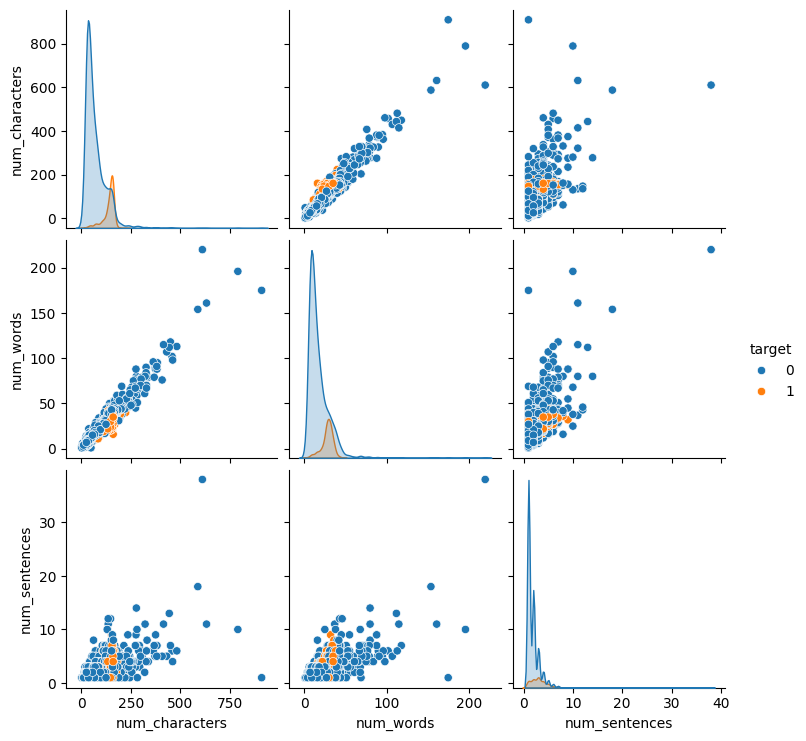

In [41]:
# using Pairplot for Relationshiop
sns.pairplot(df,hue='target')

In [42]:
# finding Correlation
# Drop non-numeric columns before computing correlation
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Compute correlation matrix
correlation_matrix = numeric_df.corr()

# Display correlation matrix|
print(correlation_matrix)


                num_characters  num_words  num_sentences
num_characters        1.000000   0.965760       0.624139
num_words             0.965760   1.000000       0.679971
num_sentences         0.624139   0.679971       1.000000


<Axes: >

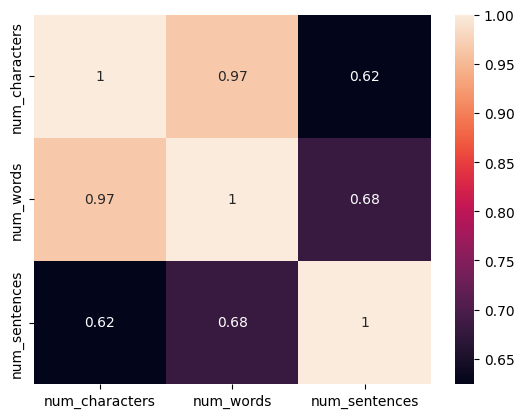

In [43]:
sns.heatmap(numeric_df.corr(),annot=True)

# 3. Data Processing
Lowercase, Tokenization, Removing Special Characters, Removing Stopwords and Punctutaions, Stemming

In [44]:
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

nltk.download('punkt')
nltk.download('stopwords')

ps = PorterStemmer()

def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))
        
    return " ".join(y)

# Example usage:
text = "This is an example sentence, showing how to transform text using NLTK."
transformed_text = transform_text(text)
print(transformed_text)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\bikas\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\bikas\AppData\Roaming\nltk_data...


exampl sentenc show transform text use nltk


[nltk_data]   Package stopwords is already up-to-date!


In [45]:
from nltk.stem.porter import PorterStemmer
ps =PorterStemmer()
ps.stem("runs")

'run'

In [46]:
df['transformed_text']=df['text'].apply(transform_text)

In [47]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [48]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [49]:
spam_wc = wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))

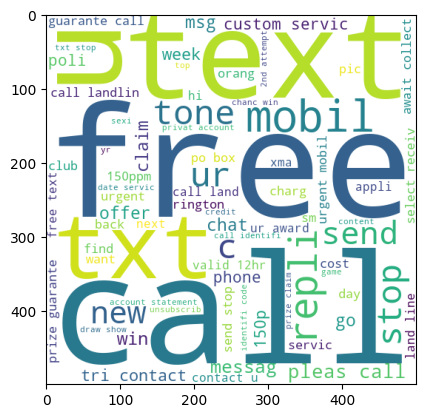

In [50]:
plt.imshow(spam_wc)

In [51]:
not_spam_wc = wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))

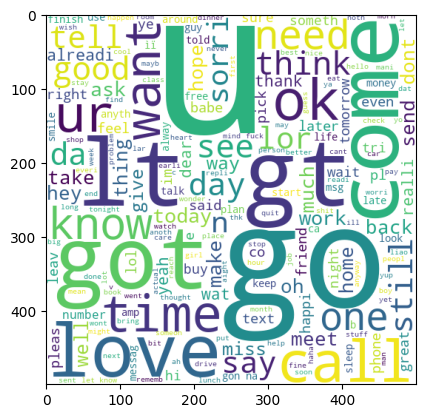

In [52]:
plt.imshow(not_spam_wc)

In [53]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [54]:
spam_corpus = []
for msz in df[df['target'] == 1]['transformed_text'].tolist():
    for words in msz.split():
       spam_corpus.append(words)

In [55]:
len(spam_corpus)

9939

In [56]:
from collections import Counter
Counter(spam_corpus).most_common(30)

[('call', 320),
 ('free', 191),
 ('2', 155),
 ('txt', 141),
 ('text', 122),
 ('u', 119),
 ('ur', 119),
 ('mobil', 114),
 ('stop', 104),
 ('repli', 103),
 ('claim', 98),
 ('4', 97),
 ('prize', 82),
 ('get', 74),
 ('new', 64),
 ('servic', 64),
 ('tone', 63),
 ('send', 60),
 ('urgent', 57),
 ('nokia', 57),
 ('contact', 56),
 ('award', 55),
 ('phone', 52),
 ('cash', 51),
 ('pleas', 51),
 ('week', 49),
 ('win', 48),
 ('c', 45),
 ('collect', 45),
 ('min', 45)]

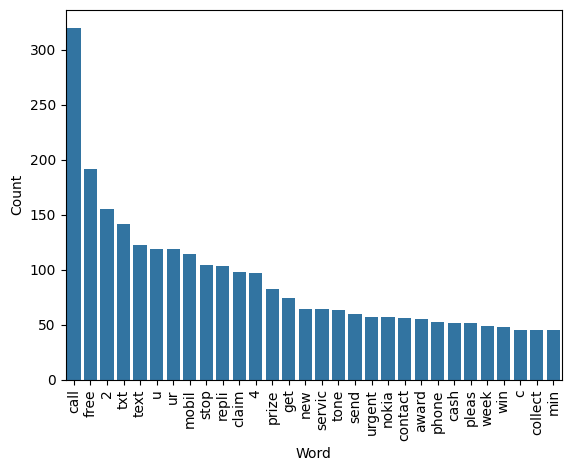

In [57]:
from collections import Counter
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming spam_corpus is already defined

# Get the most common 30 items from spam_corpus
most_common_items = Counter(spam_corpus).most_common(30)

# Convert most_common_items to a DataFrame
df_new = pd.DataFrame(most_common_items, columns=['Word', 'Count'])

# Create the barplot
sns.barplot(data=df_new, x='Word', y='Count')
plt.xticks(rotation='vertical')  # Rotate x-axis labels vertically
plt.show()  # Display the plot


In [58]:
ham_corpus = []
for msz in df[df['target'] == 0]['transformed_text'].tolist():
    for words in msz.split():
       ham_corpus.append(words)

len(ham_corpus)

35404

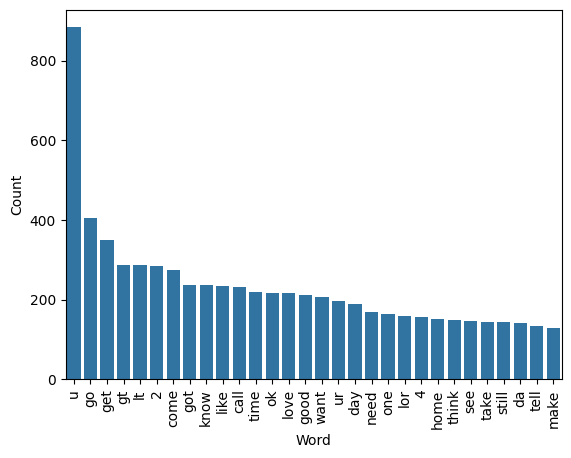

In [59]:
from collections import Counter
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming spam_corpus is already defined

# Get the most common 30 items from spam_corpus
most_common_items = Counter(ham_corpus).most_common(30)

# Convert most_common_items to a DataFrame
df_ham = pd.DataFrame(most_common_items, columns=['Word', 'Count'])

# Create the barplot
sns.barplot(data=df_ham, x='Word', y='Count')
plt.xticks(rotation='vertical')  # Rotate x-axis labels vertically
plt.show()  # Display the plot


# 4. Model Building

In [60]:
# Naive Bays work beautifully on Textual data

In [61]:
# for ML- we have to chnage text to number/vector

In [79]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer()

In [80]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [81]:
X.shape

(5169, 6708)

In [82]:
y = df['target'].values

In [83]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [84]:
from sklearn.model_selection import train_test_split

In [85]:
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [86]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [87]:
gnb = GaussianNB()
mnb =MultinomialNB()
bnb = BernoulliNB()

In [88]:
gnb.fit(X_train,y_train)
y_pred1= gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8762088974854932
[[793 103]
 [ 25 113]]
0.5231481481481481


In [89]:
mnb.fit(X_train,y_train)
y_pred2= mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9593810444874274
[[896   0]
 [ 42  96]]
1.0


In [90]:
bnb.fit(X_train,y_train)
y_pred3= bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


In [91]:
# tfidf --> MNB